In [1]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')


date = pd.DataFrame(pd.date_range(start='2000-1-1',end = '2022-12-31',freq='M'),columns=['Date'])
k = np.random.random(size = 276)
k=pd.DataFrame(k,columns=['Sales'])
df = pd.concat([date,k],axis=1)
df.set_index('Date',inplace=True)
df

,Sales
Date,
2000-01-31,0.839841
2000-02-29,0.385832
2000-03-31,0.394889
2000-04-30,0.175471
2000-05-31,0.634888
...,...
2022-08-31,0.006349
2022-09-30,0.597065
2022-10-31,0.429319


In [3]:
df.shape

(276, 1)

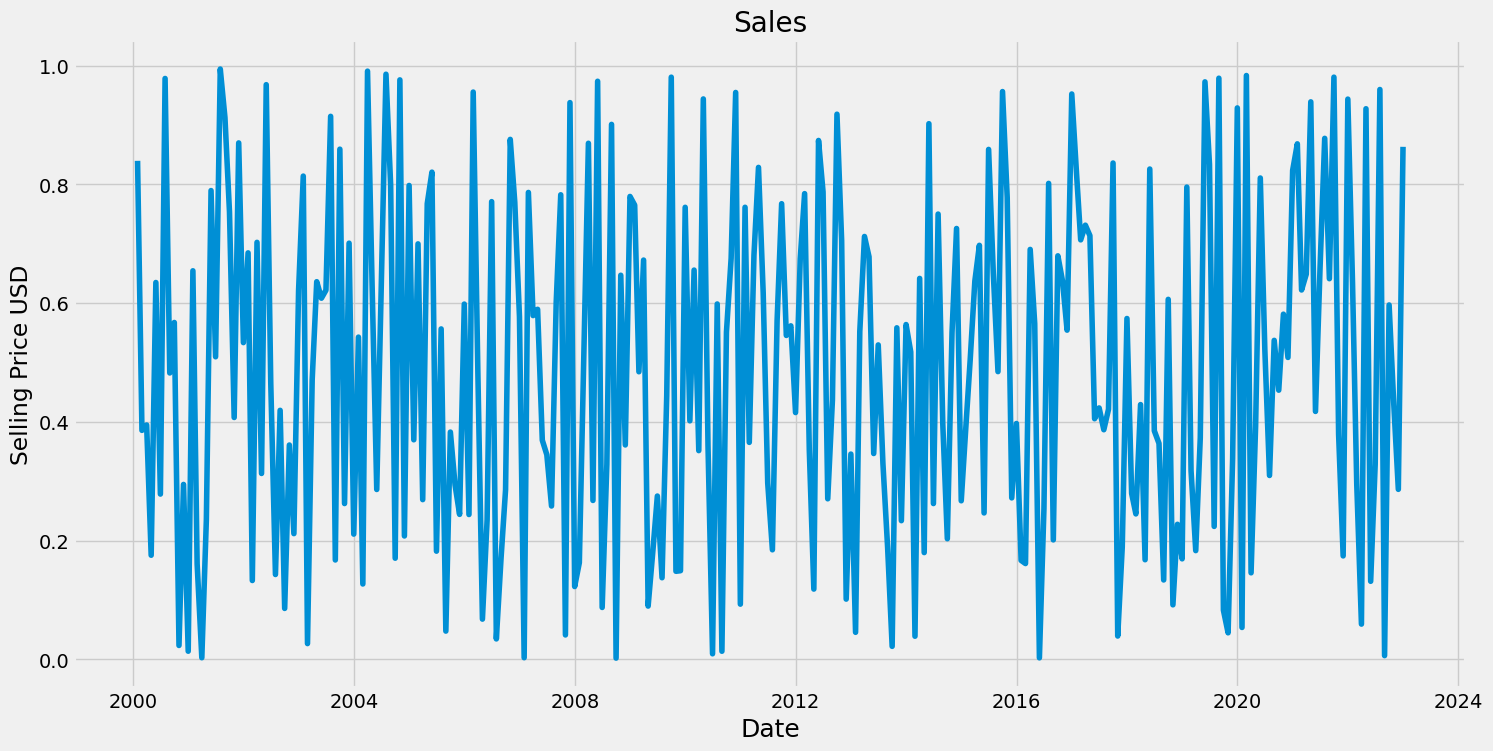

In [4]:
plt.figure(figsize=(16,8))
plt.title('Sales')
plt.plot(df['Sales'])
plt.xlabel('Date',fontsize=18)
plt.ylabel("Selling Price USD")
plt.show()

In [5]:
dataset = df.values
dataset

array([[0.83984149],
       [0.38583151],
       [0.39488865],
       [0.17547068],
       [0.63488788],
       [0.27850085],
       [0.97857598],
       [0.48251675],
       [0.56754258],
       [0.02348038],
       [0.29473269],
       [0.01379839],
       [0.654628  ],
       [0.16088455],
       [0.00283232],
       [0.23503379],
       [0.78974498],
       [0.50977515],
       [0.9944635 ],
       [0.912744  ],
       [0.75363547],
       [0.40749539],
       [0.87002278],
       [0.53363506],
       [0.68480836],
       [0.13290183],
       [0.70252204],
       [0.31323838],
       [0.96811784],
       [0.46560806],
       [0.14301843],
       [0.41956399],
       [0.0858922 ],
       [0.36113105],
       [0.21188031],
       [0.62162024],
       [0.81411807],
       [0.02663778],
       [0.47093742],
       [0.63626452],
       [0.60842786],
       [0.62196556],
       [0.91477814],
       [0.16750273],
       [0.85947665],
       [0.26254199],
       [0.70112279],
       [0.211

In [6]:
training_data_len = math.ceil((len(dataset))*0.8)
training_data_len = math.ceil((len(dataset))*0.8)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.44179264e-01],
       [3.86649496e-01],
       [3.95776852e-01],
       [1.74657814e-01],
       [6.37636719e-01],
       [2.78486740e-01],
       [9.83989310e-01],
       [4.84084308e-01],
       [5.69769313e-01],
       [2.14891868e-02],
       [2.94844424e-01],
       [1.17321416e-02],
       [6.57529879e-01],
       [1.59958601e-01],
       [6.81056156e-04],
       [2.34682698e-01],
       [7.93694366e-01],
       [5.11554029e-01],
       [1.00000000e+00],
       [9.17646961e-01],
       [7.57304911e-01],
       [4.08481337e-01],
       [8.74594532e-01],
       [5.35598921e-01],
       [6.87944213e-01],
       [1.31758940e-01],
       [7.05795223e-01],
       [3.13493577e-01],
       [9.73450097e-01],
       [4.67044535e-01],
       [1.41953973e-01],
       [4.20643501e-01],
       [8.43848666e-02],
       [3.61757543e-01],
       [2.11349718e-01],
       [6.24266222e-01],
       [8.18256414e-01],
       [2.46710627e-02],
       [4.72415204e-01],
       [6.39024033e-01],


In [8]:
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([8.44179264e-01, 3.86649496e-01, 3.95776852e-01, 1.74657814e-01,
       6.37636719e-01, 2.78486740e-01, 9.83989310e-01, 4.84084308e-01,
       5.69769313e-01, 2.14891868e-02, 2.94844424e-01, 1.17321416e-02,
       6.57529879e-01, 1.59958601e-01, 6.81056156e-04, 2.34682698e-01,
       7.93694366e-01, 5.11554029e-01, 1.00000000e+00, 9.17646961e-01,
       7.57304911e-01, 4.08481337e-01, 8.74594532e-01, 5.35598921e-01,
       6.87944213e-01, 1.31758940e-01, 7.05795223e-01, 3.13493577e-01,
       9.73450097e-01, 4.67044535e-01, 1.41953973e-01, 4.20643501e-01,
       8.43848666e-02, 3.61757543e-01, 2.11349718e-01, 6.24266222e-01,
       8.18256414e-01, 2.46710627e-02, 4.72415204e-01, 6.39024033e-01,
       6.10971560e-01, 6.24614215e-01, 9.19696873e-01, 1.66628091e-01,
       8.63966645e-01, 2.62404165e-01, 7.04385124e-01, 2.10519816e-01,
       5.44922563e-01, 1.25862560e-01, 9.96397610e-01, 6.36691142e-01,
       2.86281109e-01, 6.30007937e-01, 9.91181919e-01, 8.02762099e-01,
     

In [9]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0],60,1))
x_train.shape

(161, 60, 1)

In [11]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer ='adam',loss='mean_squared_error')

In [13]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

161/161 [==============================] - 13s 40ms/step - loss: 0.0902


In [14]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 2s 28ms/step


In [19]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.079273521672957

C:\Users\kelvin\AppData\Local\Temp\ipykernel_4360\4035558729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


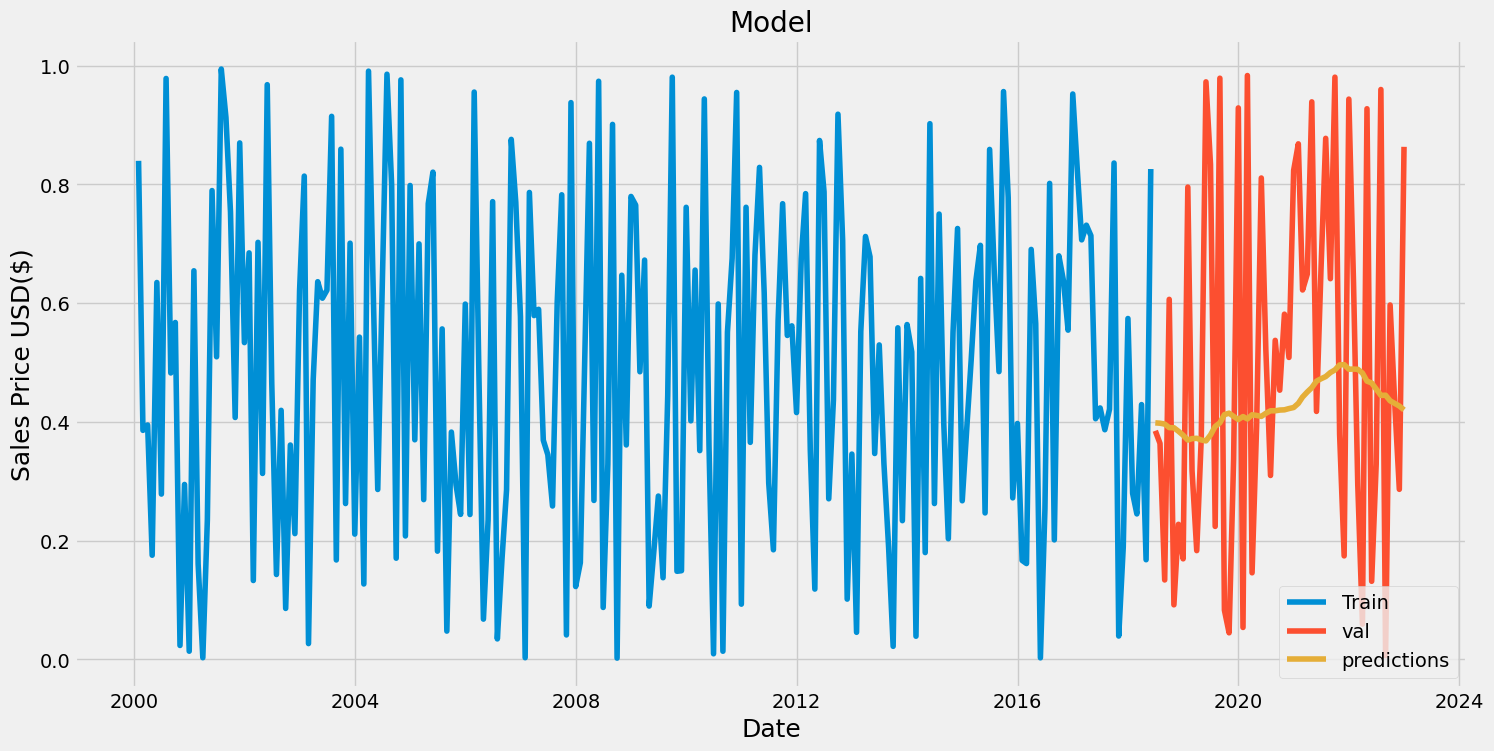

In [24]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Sales Price USD($)',fontsize=18)
plt.plot(train['Sales'])
plt.plot(valid[['Sales','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [25]:
valid

,Sales,predictions
Date,,
2018-06-30,0.385101,0.398470
2018-07-31,0.363859,0.397860
2018-08-31,0.133824,0.396438
2018-09-30,0.606504,0.390458
2018-10-31,0.091943,0.390211
2018-11-30,0.227557,0.384330
2018-12-31,0.169429,0.377641
2019-01-31,0.795603,0.369500
2019-02-28,0.317809,0.371939
